Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Name: Ciro Salcedo

#### Collaborators: Yelissa Lopez, Ceasar Stringfield

# HW 6:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Techniques for Systems of ODEs

Consider the system of ODEs

$$\begin{aligned}
v'''(t) &= t^2 v v'' - v w' \\
w''(t) &= t w w' + 4 v'
\end{aligned}$$
with 
$$
    v(0) = 1, v'(0) = \frac{1}{4}, v''(0) = \frac{1}{3}, w(0) = \frac{1}{2}, \quad \text{and} \quad w'(0) = 0.
$$

**(a)** (10) Write the system of differential equations as a first-order system of differential equations, $u' = f(x, u)$.

Let
$$
u =
\begin{bmatrix}
    v \\
    v' \\
    v'' \\
    w \\
    w'
\end{bmatrix}
=\begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3\\
    u_4\\
    u_5
\end{bmatrix}
$$

$$
u' = 
\begin{bmatrix}
    v' \\
    v'' \\
    v''' \\
    w' \\
    w''
\end{bmatrix} 
=
\begin{bmatrix}
    u_2 \\
    u_3 \\
    t^2u_1u_3 - u_1u_5 \\
    u_5 \\
    tu_4u_5 + 4u_2
\end{bmatrix} 
$$

$$ u_1(0) = 1, u_2(0) = \frac{1}{4}, u_3(0) = \frac{1}{3}, u_4(0) = \frac{1}{2}, u_5(0) = 0$$

**(b)** (10) Write code that solves the system using a method we discussed in class that is higher than 2nd order.  Do not use `scipy.integrate`.  Make sure to choose a method that will work for the non-linear right-hand-side.  Integrate the system to time $t_f = 1$ and plot the phase plane solution $(v, w)$.

Text(0, 0.5, 'w')

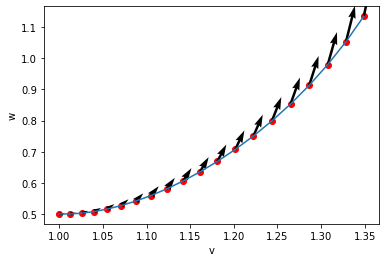

In [44]:
#The 4th-order Runge-Kutta can be used to solve the system
# Implement and compare the two-stage and 4-stage Runge-Kutta methods

vp = lambda u_2: u_2# v prime
vdp = lambda u_3: u_3#v double prime 
vtp = lambda t, u_1, u_3, u_5: t**2 * u_1 * u_3 - u_1*u_5#v triple prime
wp = lambda u_5: u_5#w prime
wdp = lambda t, u_2, u_4, u_5: t*u_4*u_5 + 4*u_2#w double prime

#each part has to be calculated starting with w'' and v'''
N = 20
t = numpy.linspace(0, 1, N)
del_t = (t[-1] - t[0])/N

u_1 = numpy.empty(t.shape)
u_2 = numpy.empty(t.shape)
u_3 = numpy.empty(t.shape)
u_4 = numpy.empty(t.shape)
u_5 = numpy.empty(t.shape)

u_1[0] = 1
u_2[0] = 1/4
u_3[0] = 1/3
u_4[0] = 1/2
u_5[0] = 0

for i in range(1,N):
    #for the runge kutta method i have to make the adjustment
    #based on the variable whose derivative im taking
    #for this first case I need to adapt the value of u_5
    y_1 = u_5[i-1]
    y_2 = u_5[i-1] + 0.5 * del_t * wdp(t[i-1],u_2[i-1], u_4[i-1], y_1)
    y_3 = u_5[i-1] + 0.5 * del_t * wdp(t[i-1]+ 0.5 * del_t,u_2[i-1], u_4[i-1], y_2)
    y_4 = u_5[i-1] + del_t * wdp(t[i-1]+ 0.5 * del_t,u_2[i-1], u_4[i-1], y_3)
    u_5[i] = u_5[i-1] + del_t / 6.0 * (wdp(t[i-1],u_2[i-1], u_4[i-1], y_1) + 2.0 * wdp(t[i-1]+ 0.5 * del_t,u_2[i-1], u_4[i-1], y_2) + 2.0 * wdp(t[i-1]+ 0.5 * del_t,u_2[i-1], u_4[i-1], y_3) + wdp(t[i-1] + del_t, u_2[i-1], u_4[i-1],y_4))
    
    #u_4 increases by the derivative and the time step
    u_4[i] = u_4[i-1]+u_5[i-1]*del_t
    
    #u_3 can also use a runge-kutta method
    y_1 = u_3[i-1]
    y_2 = u_3[i-1] + 0.5 * del_t * vtp(t[i-1],u_1[i-1], y_1, u_5[i-1])
    y_3 = u_3[i-1] + 0.5 * del_t * vtp(t[i-1]+ 0.5 * del_t,u_1[i-1], y_2, u_5[i-1])
    y_4 = u_3[i-1] + del_t * vtp(t[i-1]+ 0.5 * del_t,u_1[i-1], y_3, u_5[i-1])
    u_3[i] = u_3[i-1] + del_t / 6.0 * (vtp(t[i-1],u_1[i-1], y_1, u_5[i-1]) + 2.0 * vtp(t[i-1]+ 0.5 * del_t,u_1[i-1], y_2, u_5[i-1]) + 2.0 * vtp(t[i-1]+ 0.5 * del_t,u_1[i-1], y_3, u_5[i-1]) + vtp(t[i-1] + del_t, u_1[i-1], y_4, u_5[i-1]))
    
    #u_2 increases by the derivative and the time step
    u_2[i] = u_2[i-1]+u_3[i-1]*del_t
    #u_1 increases by the derivative and the time step
    u_1[i] = u_1[i-1] + u_2[i-1]*del_t

#MAKING THE PHASE PLANE PLOT
#using these variables v = u_1, w = u_4
#v,w = np.meshgrid(u_1, u_4)

plt.plot(u_1,u_4)
plt.scatter(u_1,u_4,color="red")
plt.quiver(u_1, u_4, u_2, u_5)


plt.xlabel("v")
plt.ylabel("w")
#fig = plt.figure()
#axes = fig.add_subplot(1, 1, 1)

#axes.plot(t_exact, u_exact, 'k', label="True")
#axes.plot(t, u_4, 'bo', label="4-Stage")
#axes.legend(loc=1)

#plt.show

**(c)** (5) For systems of non-linear ODEs it is often useful to consider the linearization of the right-hand-side function $f$ and its properties as approximately linear in some region.  The Jacobian matrix $J(f)$ is often used in this context with
$$
    u' \approx J(f) u = A(t,u) u.
$$
This is useful if attempting to use an implicit method as we can evaluate the Jacobian matrix at the current time so that it is not dependent on $U_{n+1}$ and then solve a linear system of equations.

Compute the Jacobian matrix of $f(t, u)$ for the system from part (a).  Recall that the Jacobian matrix is defined as 
$$
    [J(f(t,u))]_{ij} = \frac{\partial}{\partial u_j}  f_i(t, u).
$$

$$
J(f) = 
\begin{bmatrix}
    \frac{\partial}{\partial u_1} (u_2), \frac{\partial}{\partial u_2} (u_2), \frac{\partial}{\partial u_3} (u_2), \frac{\partial}{\partial u_4} (u_2), \frac{\partial}{\partial u_5} (u_2)  \\
    \frac{\partial}{\partial u_1} (u_3), \frac{\partial}{\partial u_2} (u_3), \frac{\partial}{\partial u_3} (u_3), \frac{\partial}{\partial u_4} (u_3), \frac{\partial}{\partial u_5} (u_3) \\
    \frac{\partial}{\partial u_1} (t^2u_1u_3 - u_1u_5), \frac{\partial}{\partial u_2} (t^2u_1u_3 - u_1u_5), \frac{\partial}{\partial u_3} (t^2u_1u_3 - u_1u_5), \frac{\partial}{\partial u_4} (t^2u_1u_3 - u_1u_5), \frac{\partial}{\partial u_5} (t^2u_1u_3 - u_1u_5)\\  
    \frac{\partial}{\partial u_1} (u_5), \frac{\partial}{\partial u_2} (u_5), \frac{\partial}{\partial u_3} (u_5), \frac{\partial}{\partial u_4} (u_5), \frac{\partial}{\partial u_5} (u_5)\\    
    \frac{\partial}{\partial u_1} (tu_4u_5 + 4u_2), \frac{\partial}{\partial u_2} (tu_4u_5 + 4u_2), \frac{\partial}{\partial u_3} (tu_4u_5 + 4u_2), \frac{\partial}{\partial u_4} (tu_4u_5 + 4u_2), \frac{\partial}{\partial u_5} (tu_4u_5 + 4u_2)
\end{bmatrix} 
$$

$$
J(f) = 
\begin{bmatrix}
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 \\
    t^2u_3 - u_5 & 0 & t^2u_1 & 0 & - u_1\\  
    0 & 0 & 0 & 0 & 1\\    
    0 & 4 & 0 & tu_5 & tu_4
\end{bmatrix} 
$$

**(d)** (10) Now using the approach outlined in part (c) use the ODE solver Adams-Moulton 3-step to solve the equations.  This time you may use `numpy.linalg.solve`.  Please plot the results as before.

I must solve

$$
\begin{bmatrix}
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 \\
    t^2u_3 - u_5 & 0 & t^2u_1 & 0 & - u_1\\  
    0 & 0 & 0 & 0 & 1\\    
    0 & 4 & 0 & tu_5 & tu_4
\end{bmatrix} 
\begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3\\
    u_4\\
    u_5
\end{bmatrix}
= 
\begin{bmatrix}
    u_2 \\
    u_3 \\
    t^2u_1u_3 - u_1u_5 \\
    u_5 \\
    tu_4u_5 + 4u_2
\end{bmatrix} 
$$

In [45]:
def f(t, U): 
    u1, u2, u3, u4, u5 = U[0], U[1], U[2], U[3], U[4]
    U_temp = numpy.empty(len(U))
    U_temp[0] = u2
    U_temp[1] = u3
    U_temp[2] = t**2*u1*u3 -u1*u5
    U_temp[3] = u5
    U_temp[4] = t*u4*u5 + 4*u2
    return U_temp
def J(t, U):
    u1, u2, u3, u4, u5 = U[0], U[1], U[2], U[3], U[4]
    return numpy.array([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [t**2 * u3 - u5, 0, t**2*u1, 0, -u1], [0, 0, 0, 0, 1], [0, 4, 0, t*u5, t*u4]])

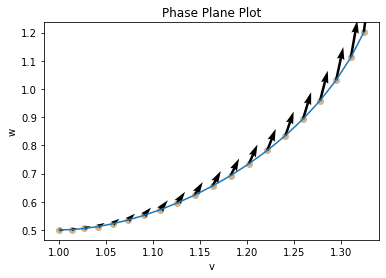

In [46]:
U_a = []
#runge-kutta degree 2
U_0 = [1, 1/4, 1/3, 1/2, 0] 
U_1 = U_0 + del_t * f(t[0], U_0 + 0.5 * del_t * f(t[0], U_0))
U_2 = U_1 + del_t * f(t[1], U_1 + 0.5 * del_t * f(t[1], U_1))
U_a.append(U_0)
U_a.append(U_1)
U_a.append(U_2)
#implementing the Jacobian AM solver
for i in range(3, len(t)):
    A = numpy.identity(5) - 9.0/24.0 * del_t * J(t[i-1], U_a[i-1])
    b = U_a[i-1] + del_t/24.0 * (f(t[i-3], U_a[i-3]) - 5 * f(t[i-2], U_a[i-2]) + 19 * f(t[i-1], U_a[i-1]))
    U_next = numpy.linalg.solve(A, b)
    U_a.append(U_next)
#plot AM solver
plt.title('Phase Plane Plot')
plt.xlabel('v')
plt.ylabel('w')
u_1_a, u_2_a, u_3_a, u_4_a, u_5_a = [], [], [], [], []
for e in U_a:
    u_1_a.append(e[0])
    u_2_a.append(e[1])
    u_3_a.append(e[2])
    u_4_a.append(e[3])
    u_5_a.append(e[4])
plt.plot(u_1_a,u_4_a,label="Adams-Moulton")
plt.scatter(u_1_a,u_4_a,color="tan")
plt.quiver(u_1_a, u_4_a, u_2_a, u_5_a)
plt.show()

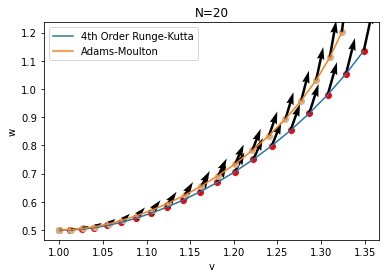

In [47]:
plt.plot(u_1,u_4, label="4th Order Runge-Kutta")
plt.scatter(u_1,u_4,color="red")
plt.quiver(u_1, u_4, u_2, u_5)

plt.plot(u_1_a,u_4_a,label="Adams-Moulton")
plt.scatter(u_1_a,u_4_a,color="tan")
plt.quiver(u_1_a, u_4_a, u_2_a, u_5_a)

plt.xlabel("v")
plt.ylabel("w")
plt.title("N=20")

plt.legend()

**(e)** (5) Comment on what you observe from parts (b) and (d).  Try increasing the $t_f$ or changing the number of times steps you take (or shrink $\Delta t$).  Explain why you might see this behavior.

The Adams-Moulton method grows faster than the 4th order runge-kutta method. As shown by the graphs below, the Runge-Kutta method converges with the Adams-Moulton Method for large N. However, the improvement in the Adams-Moulton method for greater N is not substantial. The difference between N=5 and N=20 cannot be seen from the graph below. As noted in lecture, the additional parameter leads this method to be more accurate to its explicit counterpart the Adams-Bashforth methods and also more accurate than the Runge-Kutta method which is single-step rather than multi-step

In [48]:
N = 5

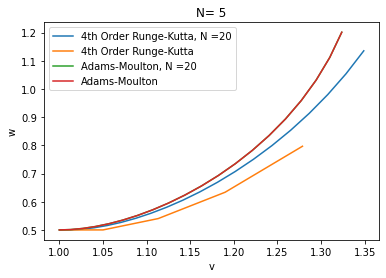

In [50]:
t = numpy.linspace(0, 1, N)
del_t = (t[-1] - t[0])/N

u_1_n = numpy.empty(t.shape)
u_2_n = numpy.empty(t.shape)
u_3_n = numpy.empty(t.shape)
u_4_n = numpy.empty(t.shape)
u_5_n = numpy.empty(t.shape)

u_1_n[0] = 1
u_2_n[0] = 1/4
u_3_n[0] = 1/3
u_4_n[0] = 1/2
u_5_n[0] = 0

for i in range(1,N):
    #for the runge kutta method i have to make the adjustment
    #based on the variable whose derivative im taking
    #for this first case I need to adapt the value of u_5
    y_1 = u_5_n[i-1]
    y_2 = u_5_n[i-1] + 0.5 * del_t * wdp(t[i-1],u_2_n[i-1], u_4_n[i-1], y_1)
    y_3 = u_5_n[i-1] + 0.5 * del_t * wdp(t[i-1]+ 0.5 * del_t,u_2_n[i-1], u_4_n[i-1], y_2)
    y_4 = u_5_n[i-1] + del_t * wdp(t[i-1]+ 0.5 * del_t,u_2_n[i-1], u_4_n[i-1], y_3)
    u_5_n[i] = u_5_n[i-1] + del_t / 6.0 * (wdp(t[i-1],u_2_n[i-1], u_4_n[i-1], y_1) + 2.0 * wdp(t[i-1]+ 0.5 * del_t,u_2_n[i-1], u_4_n[i-1], y_2) + 2.0 * wdp(t[i-1]+ 0.5 * del_t,u_2_n[i-1], u_4_n[i-1], y_3) + wdp(t[i-1] + del_t, u_2_n[i-1], u_4_n[i-1],y_4))
    
    #u_4 increases by the derivative and the time step
    u_4_n[i] = u_4_n[i-1]+u_5_n[i-1]*del_t
    
    #u_3 can also use a runge-kutta method
    y_1 = u_3_n[i-1]
    y_2 = u_3_n[i-1] + 0.5 * del_t * vtp(t[i-1],u_1_n[i-1], y_1, u_5_n[i-1])
    y_3 = u_3_n[i-1] + 0.5 * del_t * vtp(t[i-1]+ 0.5 * del_t,u_1_n[i-1], y_2, u_5_n[i-1])
    y_4 = u_3_n[i-1] + del_t * vtp(t[i-1]+ 0.5 * del_t,u_1_n[i-1], y_3, u_5_n[i-1])
    u_3_n[i] = u_3_n[i-1] + del_t / 6.0 * (vtp(t[i-1],u_1_n[i-1], y_1, u_5_n[i-1]) + 2.0 * vtp(t[i-1]+ 0.5 * del_t,u_1_n[i-1], y_2, u_5_n[i-1]) + 2.0 * vtp(t[i-1]+ 0.5 * del_t,u_1_n[i-1], y_3, u_5_n[i-1]) + vtp(t[i-1] + del_t, u_1_n[i-1], y_4, u_5_n[i-1]))
    
    #u_2 increases by the derivative and the time step
    u_2_n[i] = u_2_n[i-1]+u_3_n[i-1]*del_t
    #u_1 increases by the derivative and the time step
    u_1_n[i] = u_1_n[i-1] + u_2_n[i-1]*del_t

#MAKING THE PHASE PLANE PLOT
#using these variables v = u_1, w = u_4
#v,w = np.meshgrid(u_1, u_4)

U_a_n = []
#runge-kutta degree 2
U_0 = [1, 1/4, 1/3, 1/2, 0] 
U_1 = U_0 + del_t * f(t[0], U_0 + 0.5 * del_t * f(t[0], U_0))
U_2 = U_1 + del_t * f(t[1], U_1 + 0.5 * del_t * f(t[1], U_1))
U_a_n.append(U_0)
U_a_n.append(U_1)
U_a_n.append(U_2)
#implementing the Jacobian AM solver
for i in range(3, len(t)):
    A = numpy.identity(5) - 9.0/24.0 * del_t * J(t[i-1], U_a_n[i-1])
    b = U_a_n[i-1] + del_t/24.0 * (f(t[i-3], U_a_n[i-3]) - 5 * f(t[i-2], U_a_n[i-2]) + 19 * f(t[i-1], U_a_n[i-1]))
    U_next = numpy.linalg.solve(A, b)
    U_a_n.append(U_next)
#plot AM solver
plt.title('Phase Plane Plot')
plt.xlabel('v')
plt.ylabel('w')
u_1_a_n, u_2_a_n, u_3_a_n, u_4_a_n, u_5_a_n = [], [], [], [], []
for e in U_a:
    u_1_a_n.append(e[0])
    u_2_a_n.append(e[1])
    u_3_a_n.append(e[2])
    u_4_a_n.append(e[3])
    u_5_a_n.append(e[4])

plt.plot(u_1,u_4, label="4th Order Runge-Kutta, N =20")
plt.plot(u_1_n,u_4_n, label="4th Order Runge-Kutta")
#plt.scatter(u_1,u_4,color="red")
#plt.quiver(u_1, u_4, u_2, u_5)

plt.plot(u_1_a,u_4_a,label="Adams-Moulton, N =20")
plt.plot(u_1_a_n,u_4_a_n,label="Adams-Moulton")
#plt.scatter(u_1_a,u_4_a,color="tan")
#plt.quiver(u_1_a, u_4_a, u_2_a, u_5_a)

plt.xlabel("v")
plt.ylabel("w")
plt.title("N= %d" %N)

plt.legend()

## Question 2 - Lipschitz Constants

The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$||f(x, u) - f(x, u^*)|| \leq L ||u - u^*||.$$

The Lipschitz constant is useful for describing how much $f(x, u)$ changes if we change $u$.  This in turn then describes how much the slope of the solution $u'$ changes if $u$ is changed since $u' = f$.    

Now consider the system of ODEs

\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

For the system of equations above find the Lipschitz constant if we use the $\ell_2$ norm which is defined as

$$|| v ||_{2} = \left (\sum^n_{i=1} v_i^2 \right )^{1/2}.$$

Note that the Lipschitz constant $L$ also provides an estimate to how long (or how much) we can trust the linearization given by the Jacobian $J$ in the last question.

$\l_2$ is an operator norm meaning that,
$$
\begin{equation*}
    ||Av||_2 \leq ||A||_2||v||_2
\end{equation*}
$$

for every bounded vector $v$. The Lipschitz constant then comes from the following

$$
\begin{equation*}
    ||f(x, u) - f(x, u^*)|| = || \begin{bmatrix}3 & 4 \\ 5 & -6 \end{bmatrix} \begin{bmatrix} u_1-u_1^* \\ u_2-u_2^* \end{bmatrix}{||}_2 \leq ||\begin{bmatrix}3 & 4 \\ 5 & -6 \end{bmatrix}{||}_2 || \begin{bmatrix} u_1-u_1^* \\ u_2-u_2^* \end{bmatrix}{||}_2
\end{equation*}
$$


Simplifying $||f(x,u) - f(x,u^*)||$ and plugging it into the inequality yields:
$$
\begin{equation*}
    ||\begin{bmatrix}3 & 4 \\ 5 & -6 \end{bmatrix}{||}_2 \leq L
\end{equation*}
$$

The norm of the matrix is derived from the general expression of a matrix p-norm:
$$
\begin{equation*}
||A{||}_2 = \lambda_{max} \{\sqrt{A^T A}\}
\end{equation*}
$$
where $\lambda_{max}$ is the maximum eigenvalue of the matrix $(A^T A)^{1/2}$. From this:
$$
\begin{equation*}
L \geq 7.945
\end{equation*}
$$


## Question 3 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**(a)** (5) Reformulate the problem as an initial value problem for a system of first-order differential equations.

Let
$$
u =
\begin{bmatrix}
    x \\
    x' \\
    y \\
    y'
\end{bmatrix}
=
\begin{bmatrix}
    u_1\\
    u_2 \\
    u_3\\
    u_4
\end{bmatrix}
$$

So 
$$
u' =
\begin{bmatrix}
    x' \\
    x'' \\
    y' \\
    y''
\end{bmatrix}
=
\begin{bmatrix}
    u_2\\
    -\frac{u_1}{r^3} \\
    u_4\\
    -\frac{u_3}{r^3}
\end{bmatrix}
$$

With initial conditions
$$
u(0) =
\begin{bmatrix}
    1-e \\
    0 \\
    0 \\
    \sqrt{\frac{1+e}{1-e}}
\end{bmatrix}
$$

**(b)** (5) Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [108]:
def solve_orbit_RK2(t, e):
    # YOUR CODE HERE
    #raise NotImplementedError()
    f = lambda t, u: numpy.array([-u[1] / (u[1]**2 + u[3]**2)**(3 / 2), u[0], -u[3] / (u[1]**2 + u[3]**2)**(3 / 2), u[2]])
    
    delta_t = (t[1] - t[0]) 
    u = numpy.empty((4, len(t)))
    u[:, 0] = [0, 1 - e, numpy.sqrt( (1 + e) / (1 - e) ), 0]

    for n in range(1,len(t)):   
        u[:, n] = u[:, n-1] + 0.5 * delta_t * f(t[n-1], u[:, n-1])
        u[:, n] = u[:, n-1] + delta_t * f(t[n-1], u[:, n])

    x = u[1, :]
    y = u[3, :]
    
    return x, y

In [109]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


**(c)** (5) Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

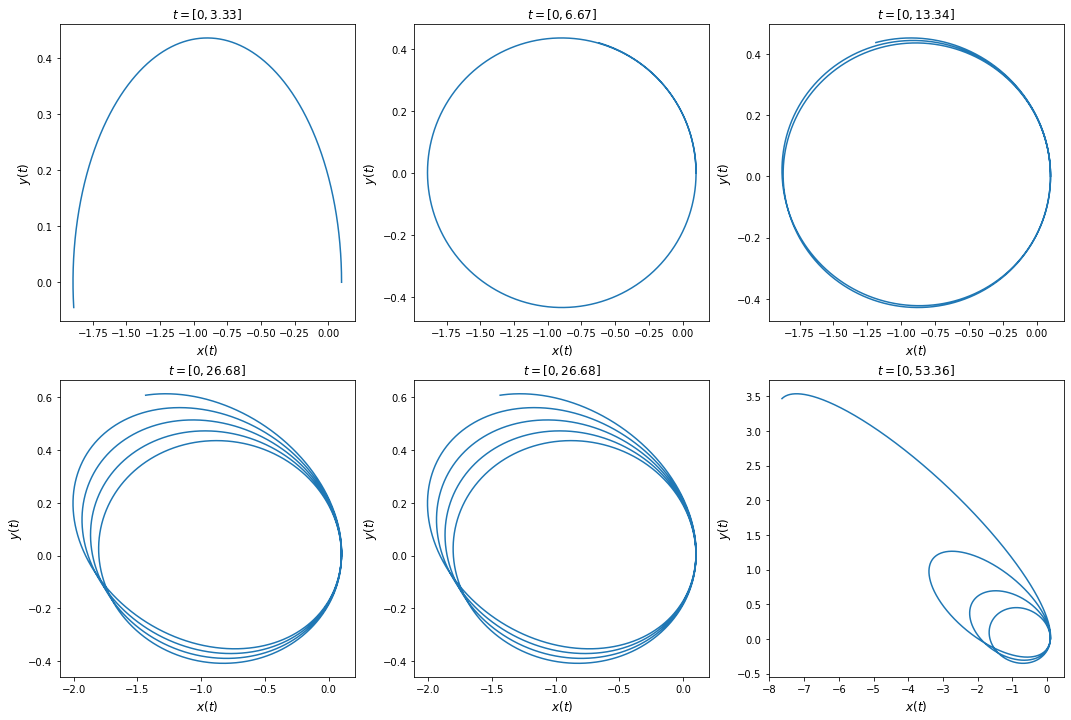

In [138]:
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9

#period of orbit 6.67
T=[6.67/2,6.67,6.67*2,6.67*4,6.67*4,6.67*8, 6.67*12]
N=5000

t = []
for period in T:
    t.append(numpy.linspace(0,period,N))
x = [[],[],[],[],[],[]]
y = [[],[],[],[],[],[]]

for i in range(0,len(x)):
    x[i],y[i] = solve_orbit_RK2(t[i], e)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
for i in range(0,6):   
    axes = fig.add_subplot(2, 3, i+1)
    axes.plot(x[i], y[i])
    axes.set_title("$t = [0, %.2f]$" %T[i])
    axes.set_xlabel("$x(t)$", fontsize=12)
    axes.set_ylabel("$y(t)$", fontsize=12)

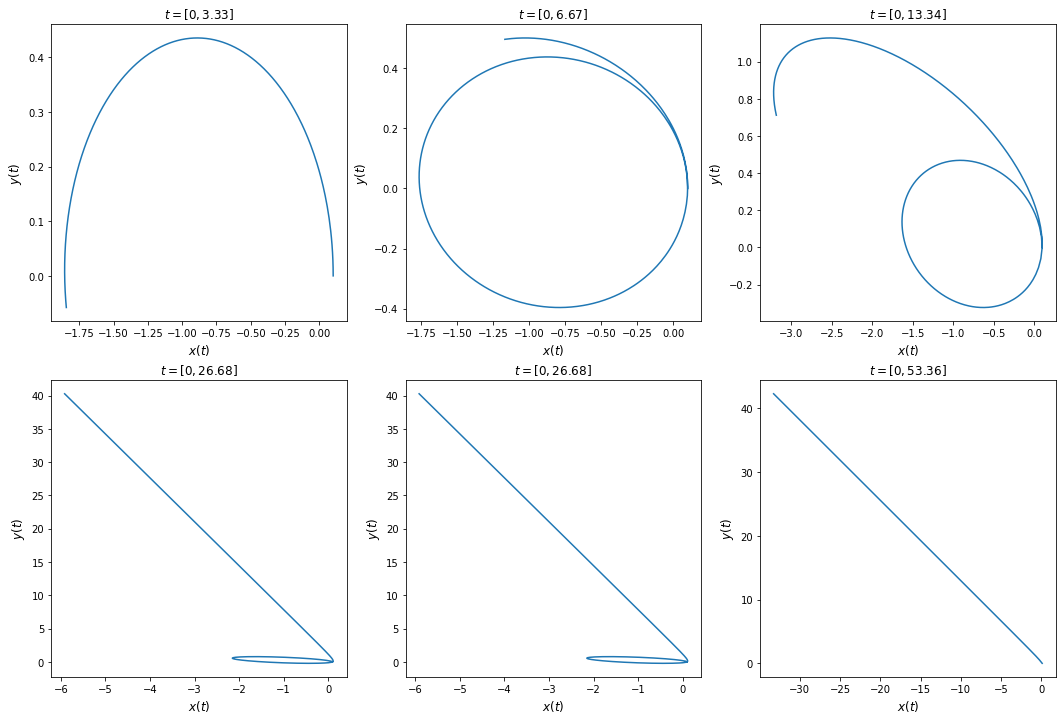

In [139]:
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9

#period of orbit 6.67
T=[6.67/2,6.67,6.67*2,6.67*4,6.67*4,6.67*8, 6.67*12]
N=1000

t = []
for period in T:
    t.append(numpy.linspace(0,period,N))
x = [[],[],[],[],[],[]]
y = [[],[],[],[],[],[]]

for i in range(0,len(x)):
    x[i],y[i] = solve_orbit_RK2(t[i], e)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight() * 3)
for i in range(0,6):   
    axes = fig.add_subplot(2, 3, i+1)
    axes.plot(x[i], y[i])
    axes.set_title("$t = [0, %.2f]$" %T[i])
    axes.set_xlabel("$x(t)$", fontsize=12)
    axes.set_ylabel("$y(t)$", fontsize=12)

It is evident that step size significantly affects how the orbit paths are calculated

## Question 4 - Absolute Stability Regions and Order Stars

**(a)** (15) Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

In [151]:
# Taylor Series methods
T_2 = lambda z: 1.0 + z + 0.5 * z**2
T_3 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3
T_4 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4
T_5 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4 + 1.0 / 120.0 * z**5

T= [T_2,T_3,T_4,T_5]

Taylor Series Method of Order 2:
Interior Region: 0.5
Exterior Region: 5.0
Taylor Series Method of Order 3:
Interior Region: 0.33333333333333337
Exterior Region: 5.666666666666666
Taylor Series Method of Order 4:
Interior Region: 0.37500000000000006
Exterior Region: 5.0
Taylor Series Method of Order 5:
Interior Region: 0.3666666666666667
Exterior Region: 3.533333333333333


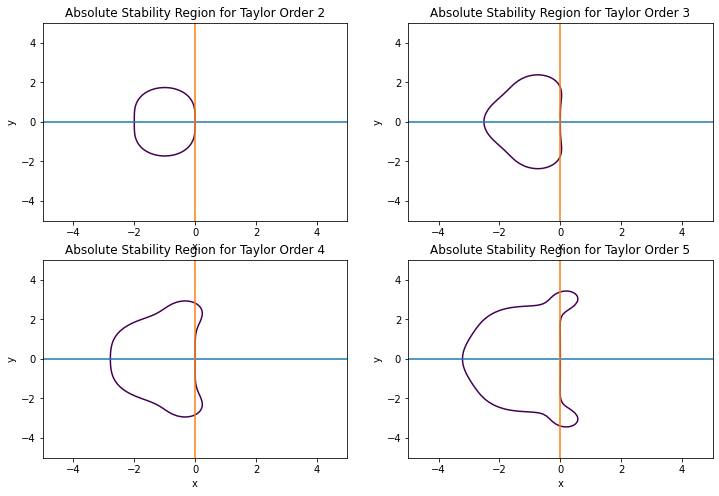

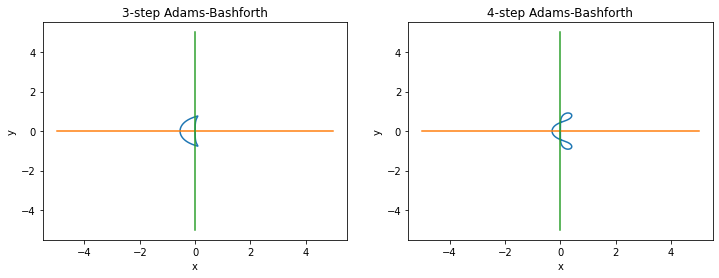

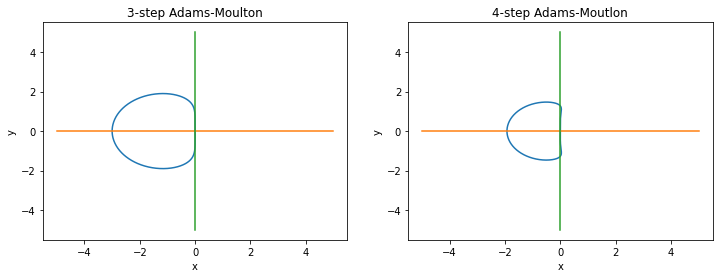

In [155]:
x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)
        
for i in range(len(T)):
    axes = fig.add_subplot(2, 2, i+1)
    axes.contour(X, Y, numpy.abs(T[i](Z)), levels=[1.0])
    axes.plot(x, numpy.zeros(x.shape))
    axes.plot(numpy.zeros(y.shape), y)
    axes.set_title("Absolute Stability Region for Taylor Order %d" %(i+2))
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    
    print("Taylor Series Method of Order %d:" %(i+2))
    print("Interior Region:", numpy.abs(T[i](-1.0)))
    print("Exterior Region:", numpy.abs(T[i](-4.0)))


# 3 and 4 step Adams-Bashforth
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

# similar to 2 step AB
rho_3AB = lambda xi: (xi - 1.0) * xi**2
sigma_3AB = lambda xi: ((23.0 * xi - 16.0) * xi + 5.0) / 12.0
z_3AB = lambda xi: rho_3AB(xi) / sigma_3AB(xi) 

rho_4AB = lambda xi: (xi - 1.0) * xi**3
sigma_4AB = lambda xi: (((55.0 * xi - 59.0) * xi + 37.0) * xi - 9.0) / 24.0
z_4AB = lambda xi: rho_4AB(xi) / sigma_4AB(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AB(xi).real, z_3AB(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("3-step Adams-Bashforth")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AB(xi).real, z_4AB(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("4-step Adams-Bashforth")
axes.set_xlabel("x")
axes.set_ylabel("y")
                       
# 3 and 4 step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

rho_3AM = lambda xi: (xi - 1.0) * xi**2
sigma_3AM = lambda xi: (((9.0 * xi + 19.0) * xi - 5.0) * xi + 1.0) / 24.0
z_3AM = lambda xi: rho_3AM(xi) / sigma_3AM(xi) 

rho_4AM = lambda xi: (xi - 1.0) * xi**3
sigma_4AM = lambda xi: ((((251.0 * xi + 646.0) * xi - 264.0) * xi + 106.0) - 19.0) * xi / 720
z_4AM = lambda xi: rho_4AM(xi) / sigma_4AM(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AM(xi).real, z_3AM(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("3-step Adams-Moulton")
axes.set_xlabel("x")           
axes.set_ylabel("y")

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AM(xi).real, z_4AM(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)
axes.set_title("4-step Adams-Moutlon")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

**(b)** (15) The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

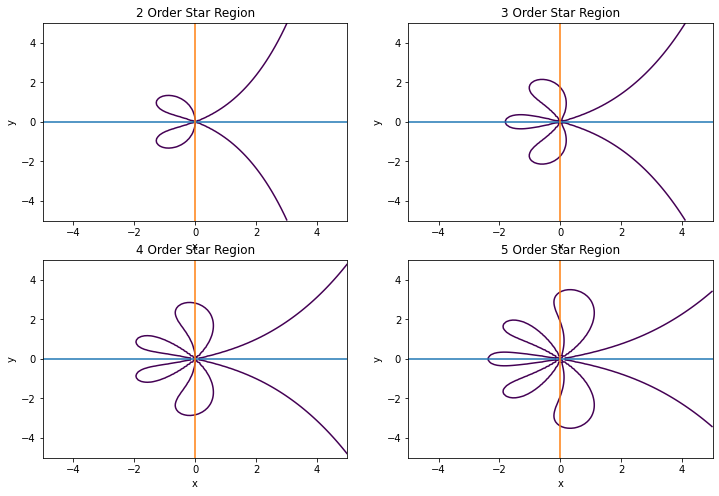

In [156]:
x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)


for i in range (len(T)):
    axes = fig.add_subplot(2, 2, i+1)
    axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * T[i](Z)), levels=[1.0])
    axes.plot(x, numpy.zeros(x.shape))
    axes.plot(numpy.zeros(y.shape), y)

    axes.set_title("%d Order Star Region" %(i+2))
    axes.set_xlabel("x")
    axes.set_ylabel("y")

plt.show()

The number of fingers is equal to the order number

## Question 5 - SciPy Integrate

Consider the decay process
$$
    A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C \overset{K_3}{\rightarrow} D
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}A}{\text{d}t} &= -K_1 A \\
    \frac{\text{d}B}{\text{d}t} &= K_1 A - K_2 B \\
    \frac{\text{d}C}{\text{d}t} &= K_2 B - K_3 C \\
    \frac{\text{d}D}{\text{d}t} &= K_3 C \\
\end{align*}

**(a)** (10) Write a function that uses `scipy.integrate` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "dopri5"), and the reaction rates $K_1$, $K_2$, and $K_3$.

In [93]:
def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    # YOUR CODE HERE
    m = numpy.array([[-K_1, 0,0,0], [K_1, -K_2,0,0], [0, K_2, -K_3,0], [0, 0, K_3,0]])
    f = lambda t, u: numpy.dot(m, u)
    
    #U = numpy.ones((t.shape[0], 4))
    #U[0,:] = u_0
   #print(U)
    

    soln = solve_ivp(f,(t[0],t[-1]), u_0,t_eval=t)

    U = []
    for i in range(0,len(soln.t)):
        U.append([])
        U[i].append(soln.y[0][i])
        U[i].append(soln.y[1][i])
        U[i].append(soln.y[2][i])
        U[i].append(soln.y[3][i])
    return U

The following is my final answer. I tried two different ways of doing it and wanted to show my work for both

In [100]:
import scipy.integrate as integrate

def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    # YOUR CODE HERE
    m = numpy.array([[-K_1, 0,0,0], [K_1, -K_2,0,0], [0, K_2, -K_3,0], [0, 0, K_3,0]])
    f = lambda t, u: numpy.dot(m, u)
    
    #U = numpy.ones((t.shape[0], 4))
    #U[0,:] = u_0
   #print(U)
    N = len(t)
    U = numpy.empty((4,N))
    U[:,0]= u_0
    
    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[:,0])
    
    
    
    for (n, t) in enumerate(t[1:]):
        integrator.integrate(t)
        if not integrator.successful():
            break
        U[:, n + 1] = integrator.y
    
    return numpy.transpose(U)

In [103]:
t = numpy.linspace(0.0, 10.0, 10)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)
U_sol = numpy.array([[1.0000000000000000e+00, 0.0000000000000000e+00,
                      0.0000000000000000e+00, 0.0000000000000000e+00],
                     [3.2919298826277271e-01, 2.2082495381343401e-01,
                      1.4813096181267352e-01, 3.0185109611111993e-01],
                     [1.0836802654276900e-01, 9.6624368667878130e-02,
                      8.6153390524786266e-02, 7.0885421426456674e-01],
                     [3.5673996630001523e-02, 3.4401353001617396e-02,
                      3.3174114479337484e-02, 8.9675053588904374e-01],
                     [1.1743631968628626e-02, 1.1605715517361529e-02,
                      1.1469419325266718e-02, 9.6518123318874338e-01],
                     [3.8659219913406520e-03, 3.8509760174843801e-03,
                      3.8360878593115726e-03, 9.8844701413186375e-01],
                     [1.2726346009991362e-03, 1.2710149139283067e-03,
                      1.2693972897971615e-03, 9.9618695319527573e-01],
                     [4.1894244902209761e-04, 4.1876692442412833e-04,
                      4.1859147343448249e-04, 9.9874369915311978e-01],
                     [1.3791293652887476e-04, 1.3789391503107924e-04,
                      1.3787489615970831e-04, 9.9958631825228084e-01],
                     [4.5399978275093905e-05, 4.5397916926305302e-05,
                      4.5395855671230534e-05, 9.9986380624912774e-01]])
numpy.testing.assert_allclose(U, U_sol)
print("Success!")

Success!
